In [ ]:
from google.colab import drive
import pandas as pd

# Montar o Google Drive
drive.mount('/content/drive')

# Caminho completo para o arquivo CSV no Google Drive
caminho_arquivo = '/content/drive/MyDrive/Consolidado_dados_indicadores_quase_final.xlsx'

# Ler o arquivo XLSX usando o pandas
df = pd.read_excel(caminho_arquivo, engine='openpyxl')  # Certifique-se de especificar o mecanismo como 'openpyxl'

# Exibir algumas linhas do DataFrame
print(df.head())



Mounted at /content/drive
  Nome da Grande Região  Código da Unidade da Federação  \
0                 Norte                              11   
1                 Norte                              11   
2                 Norte                              11   
3                 Norte                              11   
4                 Norte                              11   

  Sigla da Unidade da Federação Nome da Unidade da Federação  \
0                            RO                     Rondônia   
1                            RO                     Rondônia   
2                            RO                     Rondônia   
3                            RO                     Rondônia   
4                            RO                     Rondônia   

   Código do Município         Nome do Município  População_municipio  \
0              1100015     Alta Floresta D'Oeste                22516   
1              1100098           Espigão D'Oeste                33009   
2              

In [ ]:
 import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Selecionar apenas as variáveis quantitativas para a padronização
colunas_quantitativas = [
    "População_municipio",
    "1.1.Viabilidade_localizaçao_horas",
    "1.2.Viabilidade_nomes_cadastro_registro_horas",
    "1.3.Taxa de congestionamento (% de processos)",
    "1.4.Alíquota interna ICMS por estado (% alíquota)",
    "1.5.Alíquota IPTU (% alíquota)",
    "1.6.Alíquota ISS (% alíquota)",
    "1.7.IFGF_2020 (sem unidade)",
    "1.8.Idade_lei_zoneamento (anos)",
    "2.1Acesso_internet (acessos/habitante)",
    "2.2.Taxa_homicidio_2019 (ocorrências/100  mil habitantes)",
    "3.1.IDHM",
    "3.2.Taxa de crescimento 2015_2019",
    "3.3.PIB_per_capita (PIB/Habitante)",
    "3.4.Proporção entre grandes/médias e médias/pequenas empresas (%)",
    "4.1.Número de funcionários do município que trabalham nas áreas de ciência, tecnologia, engenharia, matemática (%)",
    "4.2.Tamanho da Indústria Inovadora (%)",
    "4.3.Tamanho da Economia Criativa (%)",
    "4.4.Tamanho das Empresas TIC (%)",
    "4.5. Infraestrutura Tecnológica (binária)",
    "5.1.Nota do Ideb",
    "5.2. Custo Médio de Salários de Dirigentes (R$)",
    "5.3.Proporção de Adultos com Pelo Menos o Ensino Médio Completo",
    "5.4.Nota Média no Enem",
    "5.5.Proporção de Adultos com Pelo Menos o Ensino Superior Completo",
]

# Substituir 'nd' por NaN
df[colunas_quantitativas] = df[colunas_quantitativas].replace('nd', np.nan)

# Converter para números
df[colunas_quantitativas] = df[colunas_quantitativas].apply(pd.to_numeric, errors='coerce')

# Tratar valores ausentes preenchendo com a média
df[colunas_quantitativas] = df[colunas_quantitativas].fillna(df[colunas_quantitativas].mean())

# Padronizar as variáveis quantitativas
scaler = StandardScaler()
df[colunas_quantitativas] = scaler.fit_transform(df[colunas_quantitativas])

# Juntar todas as variáveis
colunas_binarias = ["4.5. Infraestrutura Tecnológica (binária)"]
X = df[colunas_quantitativas + colunas_binarias].values

# Realizar a BPCA
bpca = PCA()
bpca.fit(X)

# Variância explicada pelos componentes principais
var_exp = bpca.explained_variance_ratio_
cumulative_var_exp = np.cumsum(var_exp)

# Você pode escolher o número de componentes principais com base na variância explicada
n_components = 10  # Escolha o número de componentes desejado

# Reduzir a dimensionalidade para o número de componentes escolhido
bpca = PCA(n_components=n_components)
X_reduced = bpca.fit_transform(X)

# Agora você pode usar X_reduced para análises adicionais ou visualizações

# Exemplo de como acessar os componentes principais
componentes_principais = bpca.components_

# Exemplo de como acessar a variância explicada
var_exp = bpca.explained_variance_ratio_
cumulative_var_exp = np.cumsum(var_exp)

# Exemplo de como acessar as projeções dos dados originais nos componentes principais
X_projected = bpca.inverse_transform(X_reduced)


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Seu DataFrame original com todas as variáveis
# Certifique-se de que o DataFrame 'df' já contém as variáveis de identificação (Código do Município e Nome do Município)
# e as pontuações dos componentes principais (X_reduced) que você calculou anteriormente

# Adicionar as pontuações dos componentes principais ao DataFrame
for i in range(X_reduced.shape[1]):
    df[f'Componente_Principal_{i+1}'] = X_reduced[:, i]

# Calcular a pontuação geral (soma das pontuações dos componentes principais)
df['Pontuacao_Geral'] = np.sum(X_reduced, axis=1)

# Classificar os municípios com base na pontuação geral
df_ranked = df.sort_values(by='Pontuacao_Geral', ascending=False)

# Resetar o índice para que o DataFrame classificado comece do zero
df_ranked.reset_index(drop=True, inplace=True)

# Exibir todos os municípios com as variáveis de identificação
# Código do Município, Nome do Município e Pontuações dos Componentes Principais
print(df_ranked[['Código do Município', 'Nome do Município'] + [f'Componente_Principal_{i+1}' for i in range(X_reduced.shape[1])]])

# Se você desejar salvar o DataFrame classificado em um arquivo CSV:
# df_ranked.to_csv('municipios_ranking.csv', index=False)


     Código do Município    Nome do Município  Componente_Principal_1  \
0                3144805            Nova Lima               17.733455   
1                2800605  Barra dos Coqueiros                6.837712   
2                1506708  Santana do Araguaia                1.032098   
3                3305505            Saquarema                8.418329   
4                2310308              Parambu               -1.779836   
..                   ...                  ...                     ...   
690              2611507              Quipapá               -1.761155   
691              2603801            Capoeiras               -0.754664   
692              2611705     Riacho das Almas                0.033201   
693              2616209            Vertentes               -0.033477   
694              2916500            Itapicuru               -2.498615   

     Componente_Principal_2  Componente_Principal_3  Componente_Principal_4  \
0                  6.283977                2

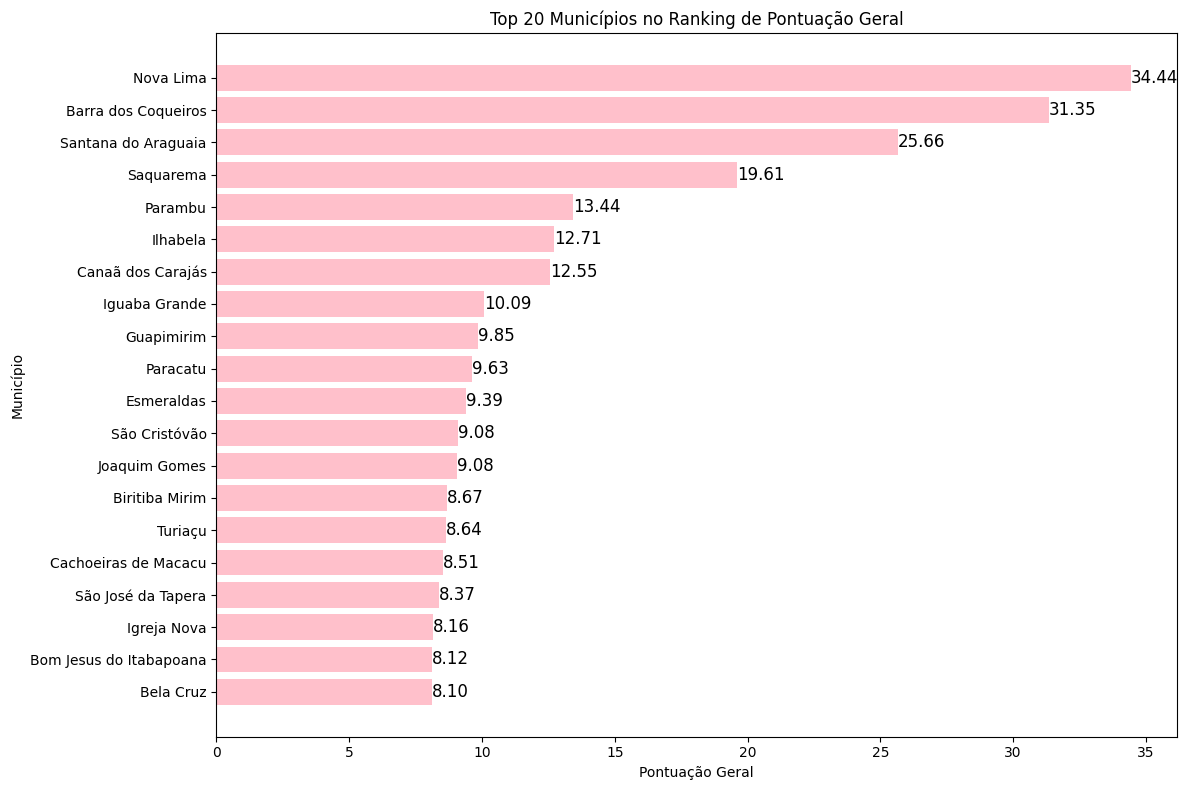

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Seu DataFrame original com todas as variáveis
# Certifique-se de que o DataFrame 'df' já contém as variáveis de identificação (Código do Município e Nome do Município)
# e as pontuações dos componentes principais (X_reduced) que você calculou anteriormente

# Adicionar as pontuações dos componentes principais ao DataFrame
for i in range(X_reduced.shape[1]):
    df[f'Componente_Principal_{i+1}'] = X_reduced[:, i]

# Calcular a pontuação geral (soma das pontuações dos componentes principais)
df['Pontuacao_Geral'] = np.sum(X_reduced, axis=1)

# Classificar os municípios com base na pontuação geral
df_ranked = df.sort_values(by='Pontuacao_Geral', ascending=False)

# Resetar o índice para que o DataFrame classificado comece do zero
df_ranked.reset_index(drop=True, inplace=True)

# Selecionar os 20 primeiros municípios do ranking
top_20_municipios = df_ranked.head(20)

# Plotar o gráfico de barras com a mesma cor rosa clara e números nas barras
plt.figure(figsize=(12, 8))
cor_rosa_claro = "#FFC0CB"
ax = plt.barh(top_20_municipios['Nome do Município'], top_20_municipios['Pontuacao_Geral'], color=cor_rosa_claro)
plt.xlabel('Pontuação Geral')
plt.ylabel('Município')

# Adicionar os números nas barras
for i, v in enumerate(top_20_municipios['Pontuacao_Geral']):
    plt.text(v, i, f'{v:.2f}', va='center', fontsize=12)

plt.title('Top 20 Municípios no Ranking de Pontuação Geral')
plt.gca().invert_yaxis()  # Inverter a ordem dos municípios
plt.tight_layout()  # Para evitar cortar rótulos de municípios
plt.show()


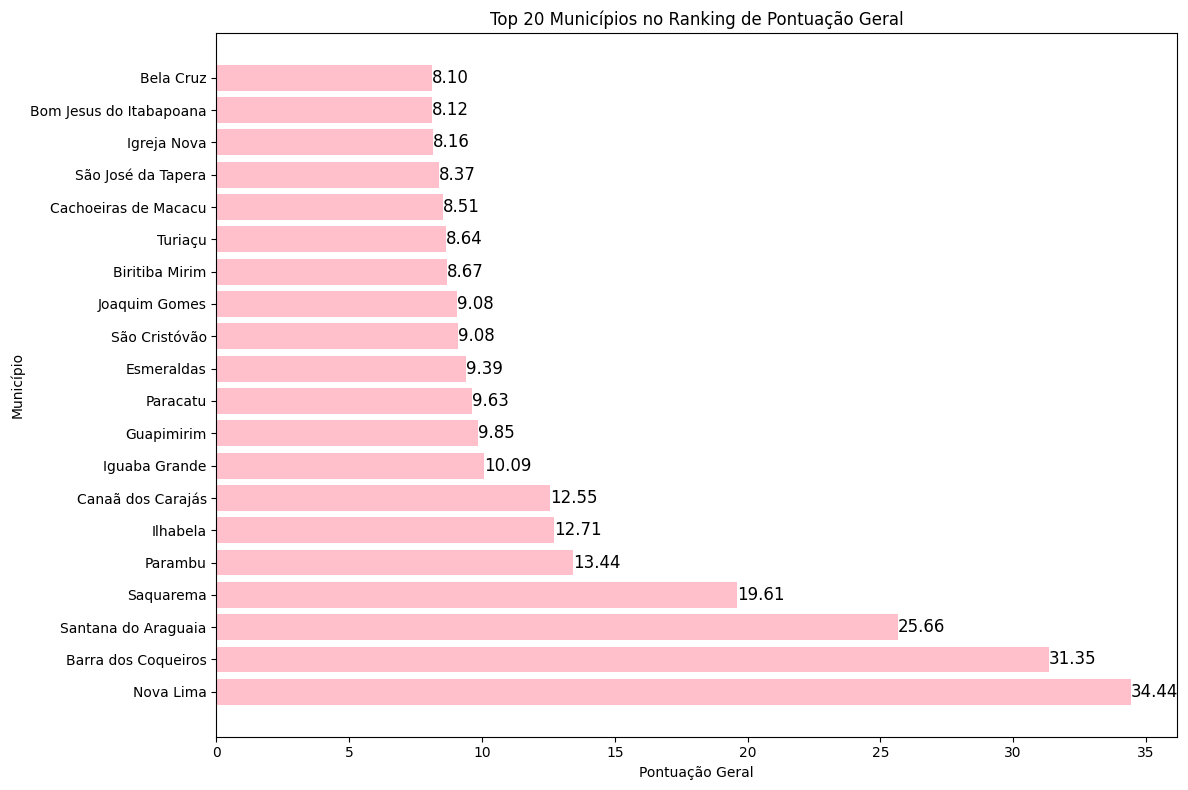

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Seu DataFrame original com todas as variáveis
# Certifique-se de que o DataFrame 'df' já contém as variáveis de identificação (Código do Município e Nome do Município)
# e as pontuações dos componentes principais (X_reduced) que você calculou anteriormente

# Adicionar as pontuações dos componentes principais ao DataFrame
for i in range(X_reduced.shape[1]):
    df[f'Componente_Principal_{i+1}'] = X_reduced[:, i]

# Calcular a pontuação geral (soma das pontuações dos componentes principais)
df['Pontuacao_Geral'] = np.sum(X_reduced, axis=1)

# Classificar os municípios com base na pontuação geral
df_ranked = df.sort_values(by='Pontuacao_Geral', ascending=False)

# Resetar o índice para que o DataFrame classificado comece do zero
df_ranked.reset_index(drop=True, inplace=True)

# Selecionar os 20 primeiros municípios do ranking
top_20_municipios = df_ranked.head(20)

# Plotar o gráfico de barras com a mesma cor rosa clara e números nas barras
plt.figure(figsize=(12, 8))
cor_rosa_claro = "#FFC0CB"
ax = plt.barh(top_20_municipios['Nome do Município'], top_20_municipios['Pontuacao_Geral'], color=cor_rosa_claro)
plt.xlabel('Pontuação Geral')
plt.ylabel('Município')

# Adicionar os números nas barras
for i, v in enumerate(top_20_municipios['Pontuacao_Geral']):
    plt.text(v, i, f'{v:.2f}', va='center', fontsize=12)

plt.title('Top 20 Municípios no Ranking de Pontuação Geral')
plt.tight_layout()  # Para evitar cortar rótulos de municípios
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from google.colab import files

# Aqui, você deve garantir que 'df' e 'X_reduced' estejam definidos.
# Supondo que 'df' seja o seu DataFrame original e 'X_reduced' a matriz com as pontuações dos componentes principais
# Exemplo:
# df = pd.DataFrame({'Nome do Município': ['Município A', 'Município B'], 'Algum dado': [1, 2]})
# X_reduced = np.array([[0.1, 0.2], [0.2, 0.1]])

# Primeiro, adicione as pontuações dos componentes principais ao DataFrame
for i in range(X_reduced.shape[1]):
    df[f'Componente_Principal_{i+1}'] = X_reduced[:, i]

# Calcular a pontuação geral como a soma das pontuações dos componentes principais
df['Pontuacao_Geral'] = np.sum(X_reduced, axis=1)

# Classificar os municípios com base na pontuação geral, em ordem decrescente
df_ranked = df.sort_values(by='Pontuacao_Geral', ascending=False)

# Resetar o índice para que o DataFrame classificado comece do zero
df_ranked.reset_index(drop=True, inplace=True)

# Salvar o DataFrame como um arquivo Excel
file_path = 'RankingMunicipios.xlsx'  # Nome do arquivo
df_ranked.to_excel(file_path, index=False)

# Gerar o link de download
files.download(file_path)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# ...

# Adicionar as siglas dos estados ao DataFrame (substitua 'SiglaEstado' pelo nome da coluna real em seu DataFrame)
df['SiglaEstado'] = df['SiglaEstado'].astype(str)  # Certifique-se de que a coluna de siglas seja do tipo string

# Criar uma nova coluna com o formato "Cidade - SiglaEstado"
df['Cidade_Estado'] = df['Nome do Município'] + ' - ' + df['SiglaEstado']

# Calcular a pontuação geral (soma das pontuações dos componentes principais)
df['Pontuacao_Geral'] = np.sum(X_reduced, axis=1)

# Classificar os municípios com base na pontuação geral
df_ranked = df.sort_values(by='Pontuacao_Geral', ascending=False)

# Resetar o índice para que o DataFrame classificado comece do zero
df_ranked.reset_index(drop=True, inplace=True)

# Selecionar os 20 primeiros municípios do ranking
top_20_municipios = df_ranked.head(20)

# Plotar o gráfico de barras com a mesma cor rosa clara e números nas barras
plt.figure(figsize=(12, 8))
cor_rosa_claro = "#FFC0CB"
ax = plt.barh(top_20_municipios['Cidade_Estado'], top_20_municipios['Pontuacao_Geral'], color=cor_rosa_claro)
plt.xlabel('Pontuação Geral')
plt.ylabel('Município - Estado')

# Adicionar os números nas barras
for i, v in enumerate(top_20_municipios['Pontuacao_Geral']):
    plt.text(v, i, f'{v:.2f}', va='center', fontsize=12)

plt.title('Top 20 Municípios no Ranking de Pontuação Geral')
plt.tight_layout()  # Para evitar cortar rótulos de municípios
plt.show()


KeyError: ignored

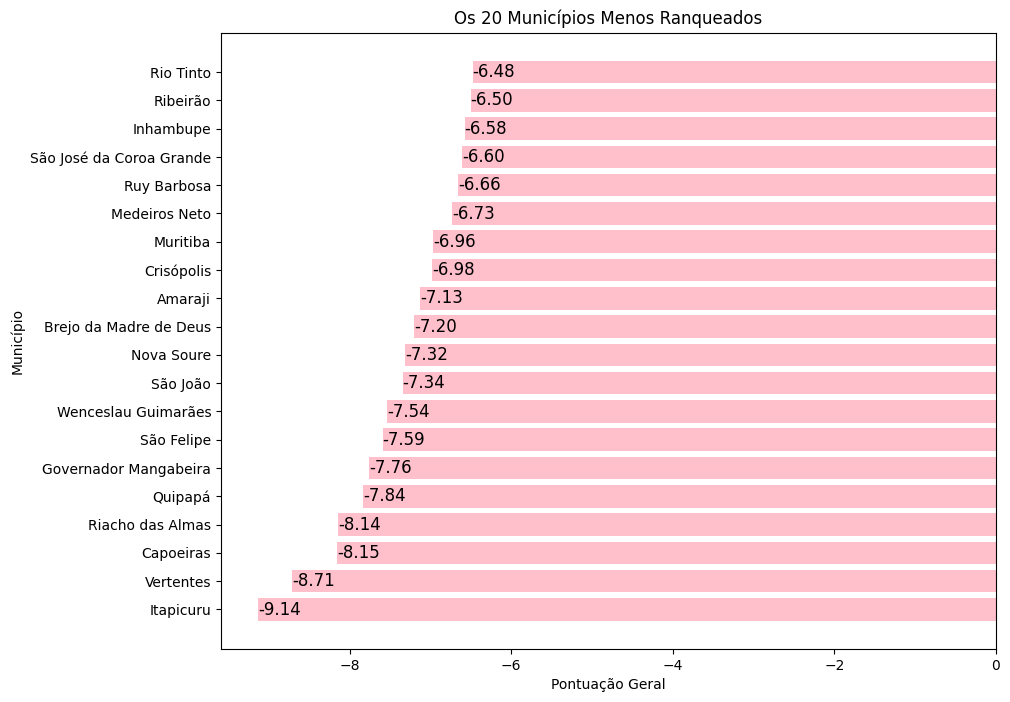

In [ ]:
import matplotlib.pyplot as plt

# Selecionar os 20 piores municípios (os menos ranqueados)
bottom_20_municipios = df_ranked.tail(20)

# Criar um gráfico de barras horizontais com a cor rosa clara e números nas barras
plt.figure(figsize=(10, 8))
cor_rosa_claro = "#FFC0CB"
ax = plt.barh(bottom_20_municipios['Nome do Município'], bottom_20_municipios['Pontuacao_Geral'], color=cor_rosa_claro)
plt.xlabel('Pontuação Geral')
plt.ylabel('Município')

# Adicionar os números nas barras
for i, v in enumerate(bottom_20_municipios['Pontuacao_Geral']):
    plt.text(v, i, f'{v:.2f}', va='center', fontsize=12)

plt.title('Os 20 Municípios Menos Ranqueados')

# Inverter a ordem dos municípios para que o pior fique no topo
plt.gca().invert_yaxis()

plt.show()
